In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager
mpl.rc('font',family='DFYuanLight-B5')
mpl.rcParams['axes.unicode_minus']=False
import wget
#url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
#df = pd.read_csv(url)
#df.to_csv("Salary_Data.csv",index = False)
df = pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,0.3,36.2
1,0.6,36.6
2,0.8,42.8
3,1.1,39.3
4,1.3,46.2
5,1.5,37.7
6,2.0,43.5
7,2.2,39.8
8,2.9,56.6
9,3.0,60.1


In [15]:
# y = ax + b
x = df['YearsExperience']
y = df['Salary']


In [16]:
w = 10
b = 0
y_pred = w*x+b
cost = (y-y_pred)**2
cost.sum() / len(x)

np.float64(602.547878787879)

In [17]:
def compute_cost(x, y, w, b):
  y_pred = w*x + b
  cost = (y - y_pred)**2
  cost = cost.sum() / len(x)

  return cost


In [18]:
compute_cost(x,y,10,10)

np.float64(227.88121212121214)

In [19]:
# b = 0 w-100~100 或是多少
costs = [ ]
for w in range(-100 , 101):
    cost = compute_cost(x,y,w,0)
    costs.append(cost)
costs

[np.float64(420951.08121212124),
 np.float64(413557.2063636363),
 np.float64(406228.88242424245),
 np.float64(398966.1093939394),
 np.float64(391768.8872727272),
 np.float64(384637.21606060606),
 np.float64(377571.0957575757),
 np.float64(370570.52636363637),
 np.float64(363635.5078787879),
 np.float64(356766.0403030302),
 np.float64(349962.12363636366),
 np.float64(343223.7578787879),
 np.float64(336550.94303030305),
 np.float64(329943.6790909091),
 np.float64(323401.966060606),
 np.float64(316925.8039393939),
 np.float64(310515.19272727263),
 np.float64(304170.13242424245),
 np.float64(297890.623030303),
 np.float64(291676.6645454545),
 np.float64(285528.25696969696),
 np.float64(279445.40030303027),
 np.float64(273428.0945454546),
 np.float64(267476.33969696966),
 np.float64(261590.1357575757),
 np.float64(255769.48272727273),
 np.float64(250014.38060606056),
 np.float64(244324.82939393938),
 np.float64(238700.82909090907),
 np.float64(233142.3796969697),
 np.float64(227649.48121212

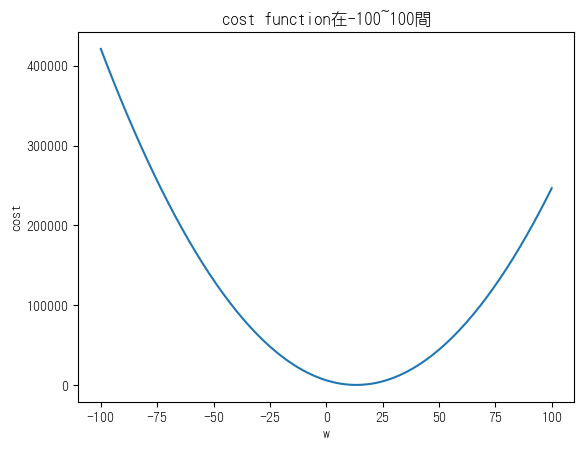

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(-100,101), costs)

plt.title("cost function在-100~100間")
plt.xlabel("w")
plt.ylabel("cost")
plt.show()

In [21]:
# w=-100~100 b=-100~100 的 cost
import numpy as np

ws = np.arange(-100, 101)
bs = np.arange(-100, 101)
costs = np.zeros((201, 201))

i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x, y, w, b)
    costs[i,j] = cost
    j = j+1
  i = i+1
costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]],
      shape=(201, 201))

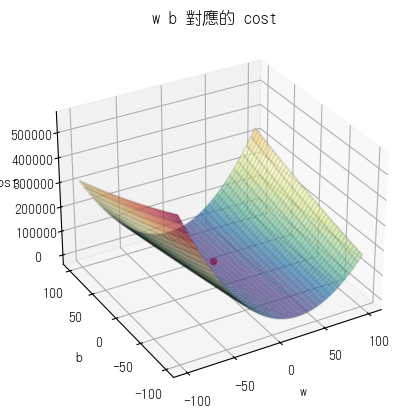

<Figure size 200x200 with 0 Axes>

當 w = [9],b = [29]會有最小cost:[32.69484848]


In [22]:
ax = plt.axes(projection = '3d')
b_grid, w_grid = np.meshgrid(bs,ws)
ax.view_init(30,-120)
plt.figure(figsize=(2,2))
ax.plot_surface(w_grid, b_grid , costs , cmap = 'Spectral_r', alpha = 0.7)
ax.plot_wireframe(w_grid ,b_grid,costs, color = 'black',alpha = 0.1)

ax.set_title('w b 對應的 cost')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('cost')
w_index,y_index = np.where(costs == np.min(costs))
ax.scatter(ws[w_index],bs[y_index],costs[w_index,y_index],color = 'red')
plt.show()
print(f"當 w = {ws[w_index]},b = {bs[y_index]}會有最小cost:{costs[w_index,y_index]}")

In [23]:
print(ws[w_index],bs[y_index])

[9] [29]


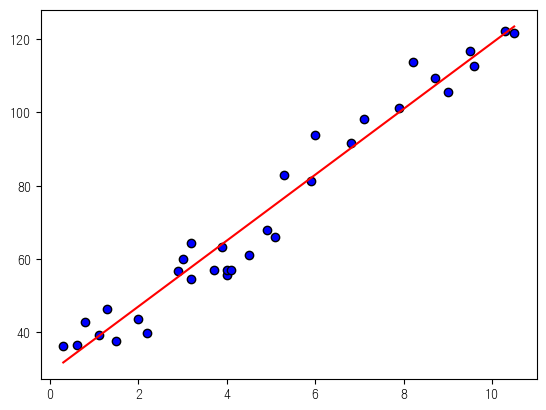

In [30]:
plt.scatter(x,y,edgecolors='black',color='blue')
y_pred = ws[w_index]*x+bs[y_index]
plt.plot(x,y_pred,color='red')
plt.show()